In [195]:
from dataWrangler import *
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import glob 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [203]:
li=[]
for filename in glob.glob(r"..\UsedCar-PriceEstimator\data\*.csv"):
    collection = pd.read_csv(filename, index_col=None, header=0)
    li.append(collection)
frame = pd.concat(li, axis=0, ignore_index=True)

In [204]:
df=Spell(frame)
df=Replace(df)
df=Process(df)

In [205]:
df=Outliers_light(df)

In [206]:
df_test = df['Make&Model'].value_counts().rename_axis('unique_values').to_frame('counts')
df_test=df_test.reset_index()
df_test=df_test[(df_test['counts']>430) & (df_test['counts']<620) ]


In [207]:
thelist=list(df_test.unique_values)
    


In [208]:
df_top4=df[df['Make&Model'].isin(thelist)]

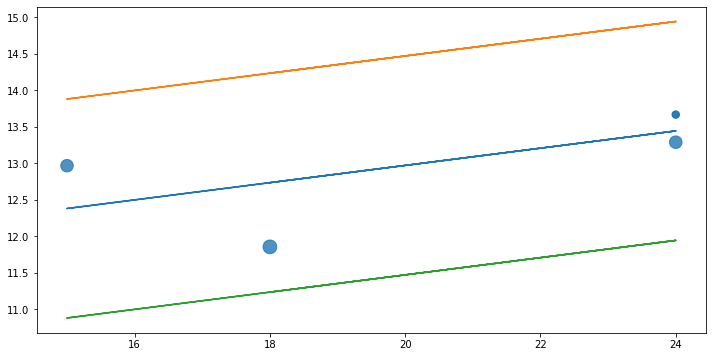

In [9]:
plt.figure(figsize=(12,6))
plt.scatter(df['year:'],df['price:'], s=df['odometer:']/1000, alpha=0.8)
m, b = np.polyfit(df['year:'], df['price:'], 1)
plt.plot(df['year:'], m*df['year:']+ b)
plt.plot(df['year:'], m*df['year:']+ b+1.5)
plt.plot(df['year:'], m*df['year:']+ b-1.5)

In [10]:
try:
    m, b = np.polyfit(df['year:'], df['price:'], 1)
except:
    m, b = np.polyfit(df['year:'], df['price:'], 1)
df_new=df
for x,y in zip(df['year:'], m*df['year:']+ b-1):
    left=x
    bottom=y
    multi_outliers = df_new[(df_new['price:'] <bottom) & (df_new['year:'] < left)]
    df_new=df_new[(~df_new.isin(multi_outliers) )]
for x,y in zip(df['year:'], m*df['year:']+ b+1):
    right=x
    top=y
    multi_outliers2 = df[(df['price:'] >top) & (df['year:'] > right) ]
    df_new=df_new[(~df_new.isin(multi_outliers2) )]


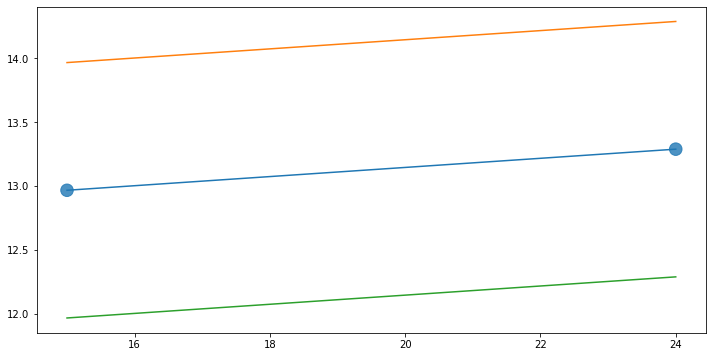

In [11]:
df_new=df_new.dropna()
plt.figure(figsize=(12,6))
plt.scatter(df_new['year:'],df_new['price:'], s=df_new['odometer:']/1000, alpha=0.8)
m, b = np.polyfit(df_new['year:'], df_new['price:'], 1)
plt.plot(df_new['year:'], m*df_new['year:']+ b)
plt.plot(df_new['year:'], m*df_new['year:']+ b+1)
plt.plot(df_new['year:'], m*df_new['year:']+ b-1)


In [13]:
#import pandas_profiling
#profile=df.profile_report()



In [ ]:
#sns.swarmplot(x,y,data)
#ECDF

In [ ]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [182]:
df_test.head()

,unique_values,counts
5,toyota corolla,661
6,chevrolet silverado,619
7,ford f150,596


In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
sns.swarmplot(x='Make&Model',y='price:',data=df_top4)

In [172]:
df_top4.head()
#np.mean
#np.median

,Make&Model,year:,score:,odometer:,price:
33,toyota tacoma,21,2,245000,13.643856
58,toyota corolla,19,2,135000,12.135709
70,ford f150,10,2,208000,13.853310
118,ford f150,14,2,230000,13.213712
123,ford f150,12,2,110000,13.919981


In [ ]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red x's
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


In [ ]:
#_ = sns.boxplot(x='species', y='petal length (cm)', data=df)
#np.var
#cdf,
#analog,pmf
#contious pdf

In [ ]:
# Create plot axes for the first line plot
plt.axes([0.05,0.05,0.425,0.9])

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')

# Create plot axes for the second line plot
plt.axes([0.525,0.05,0.425,0.9])

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')

# Display the plot
plt.show()
plt.style.avaiable

In [ ]:
cs_max = computer_science.max()
yr_max = year[computer_science.argmax()]
plt.annotate('Maximum', xy=(yr_max, cs_max), xytext=(yr_max-1, cs_max-10), arrowprops=dict(facecolor='black'))

In [ ]:
plt.hist2d(hp, mpg, bins=(20,20), 
           range=((40,235), (8, 48)))


In [ ]:
plt.hexbin(hp, mpg, gridsize=(15,12), 
           extent=(40,235,8,48))

In [ ]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x='weight', y='hp', data=auto)

In [ ]:
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, order=2, color='green', label='Second Order')
